## Logistic Regression:

* when Target is Binary or multi class values
* Data is linearly seperable
* Need probabilistic result


Usually the data here will be seperable as shown below, we dont need a model keeping the 0.5 as the margin predicting the Target as we end up with the wrong predicitons.We need a model where it can give us the probabilistic results. That is the reason we go with the sigmoid function for the LogisticRegression instead of straight line to predict the output.


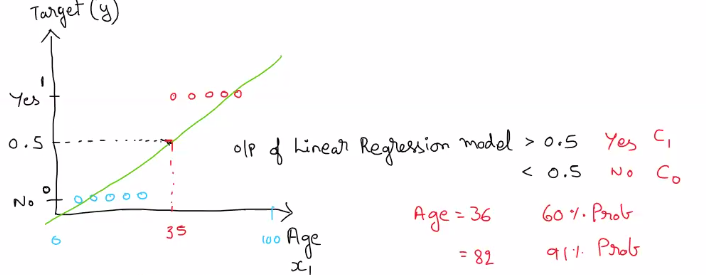



```
# This is formatted as code
```




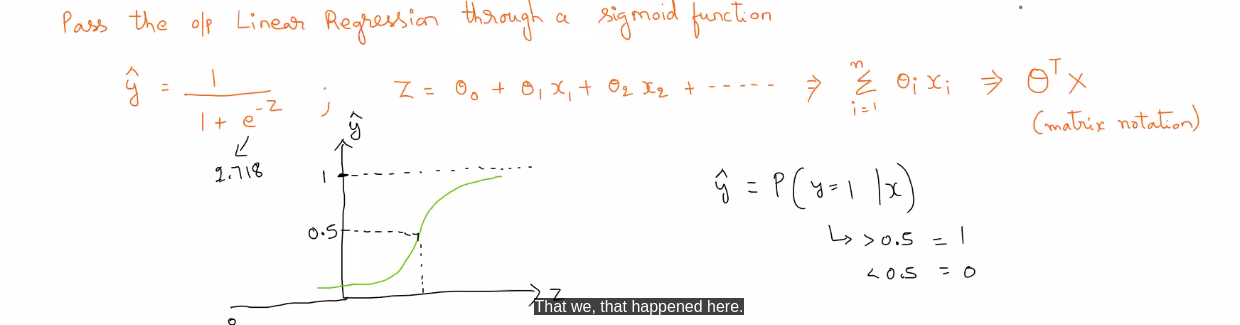

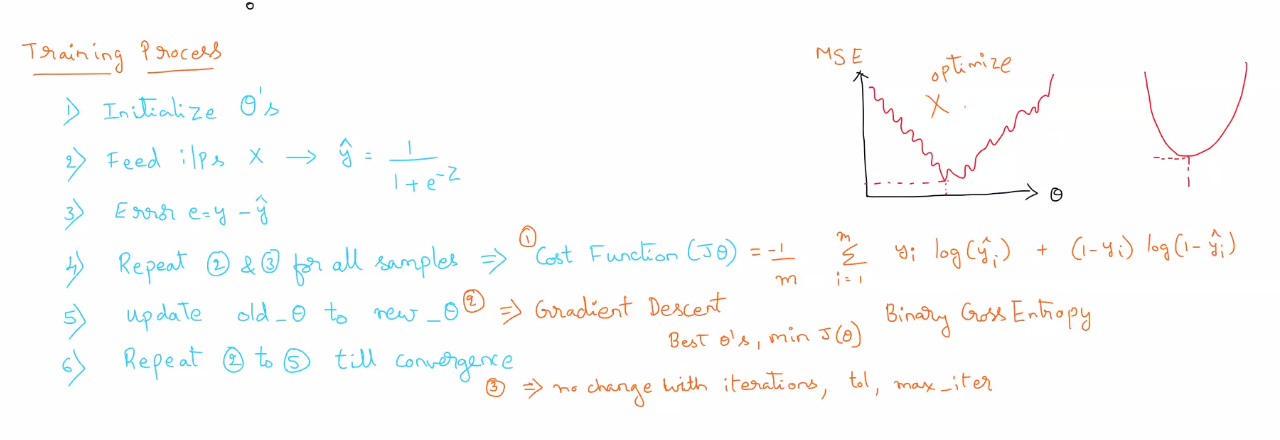

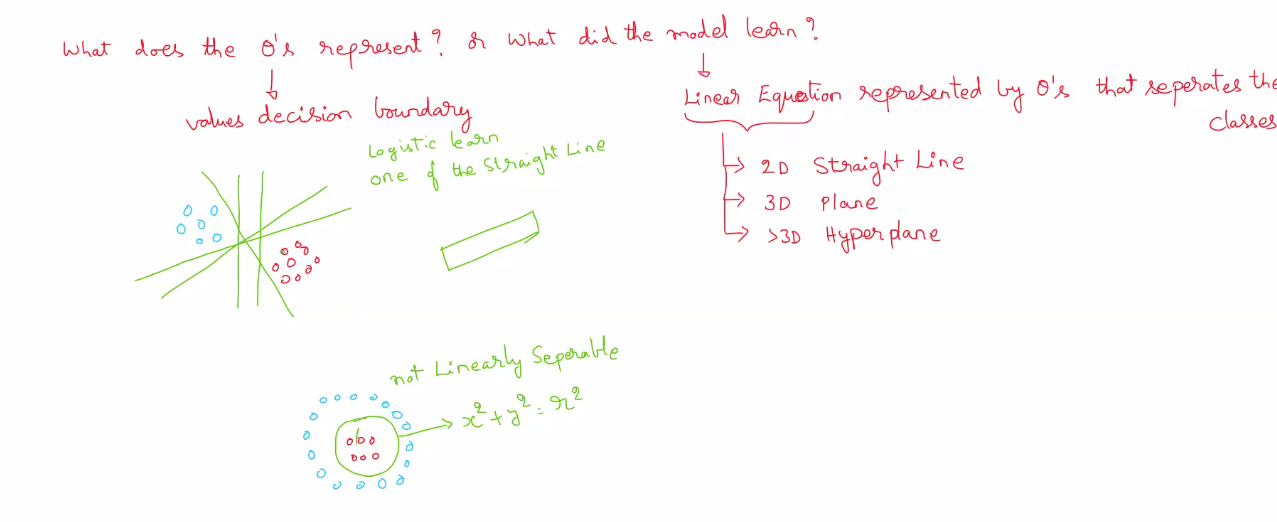

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [111]:
from sklearn.datasets import make_blobs

data = make_blobs(n_samples=400, n_features=2,centers=2,center_box=(-10.0,10.0),cluster_std=1.4,random_state=42)

x= pd.DataFrame(data[0],columns=['Feature1','Feature2'])
y= pd.DataFrame(data[1],columns=['Target'])

df=pd.concat([x,y],ignore_index=True,axis=1)
df.columns=['Feature1','Feature2','Target']

df.head()


,Feature1,Feature2,Target
0,6.048689,1.165521,1
1,4.808293,2.693384,1
2,4.935303,1.837771,1
3,-1.788131,14.408110,0
4,4.418668,1.375536,1


####
* Here the centers represents the no. of classes.
*cluster_std represents the distance b/w the points , cluster distance will increase if you reduce the value of the cluster_std.



<Axes: xlabel='Feature1', ylabel='Feature2'>

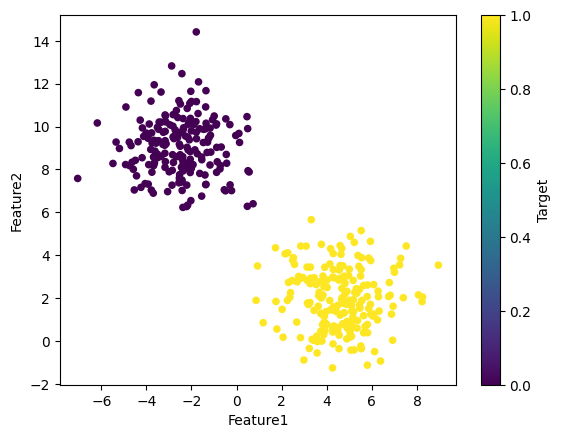

In [112]:
df.plot.scatter(x='Feature1',y='Feature2',c='Target',colormap='viridis')

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [115]:
x_train.shape

(280, 2)

In [116]:
print(y_train.value_counts())

Target
1         146
0         134
dtype: int64


In [117]:
print(y_test.value_counts())

Target
0         66
1         54
dtype: int64


In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

In [119]:
print(y_train.value_counts())

Target
0         140
1         140
dtype: int64


In [120]:
print(y_test.value_counts())

Target
0         60
1         60
dtype: int64


In [121]:
from sklearn.linear_model import LogisticRegression

#### solver = saga stochastic gradient descent

In [122]:
model = LogisticRegression(random_state=42,max_iter=3000,penalty=None,solver='saga')
model.fit(x_train,y_train['Target'])
model.intercept_,model.coef_

(array([2.30082162]), array([[ 5.30832218, -1.3003549 ]]))

In [123]:
y_pred=model.predict(x_test)

In [124]:
y_test[:5],y_pred[:5]

(     Target
 320       1
 77        0
 15        0
 296       1
 95        1,
 array([1, 0, 0, 1, 1]))

In [125]:
theta0 = model.intercept_[0]
theta1 = model.coef_[0][0]
theta2 = model.coef_[0][1]

m = -(theta1/theta2)
c= -(theta0/theta2)

## as we know that the values are ranging in b/w -10 to 10

x1 = np.arange(-10,10,0.2)
x2 = m*x1 +c
print(f'slope is :{m} \nintercept is : {c}')


slope is :4.0822102996067 
intercept is : 1.7693797367520685


#### Let us plot

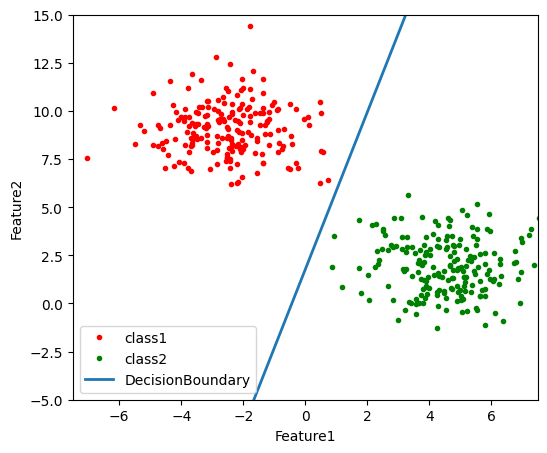

In [126]:
plt.figure(figsize=(6,5))
##plotting the target 0
plt.plot(df['Feature1'][df['Target']==0],df['Feature2'][df['Target']==0],'r.')
## plotting the target 1
plt.plot(df['Feature1'][df['Target']==1],df['Feature2'][df['Target']==1],'g.')
## plotting the decision boundary where we got values of x1,x2 above
plt.plot(x1,x2,linewidth=2)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(['class1','class2','DecisionBoundary'])
## setting the axis for better visualization
plt.axis([-7.5,7.5,-5,15])
plt.show()

In [127]:
model.predict_proba(x_test)[:5]

array([[0.00000000e+00, 1.00000000e+00],
       [9.99994079e-01, 5.92083396e-06],
       [1.00000000e+00, 2.34838424e-12],
       [2.51840054e-07, 9.99999748e-01],
       [9.96316983e-08, 9.99999900e-01]])

<Axes: xlabel='Feature1', ylabel='Feature2'>

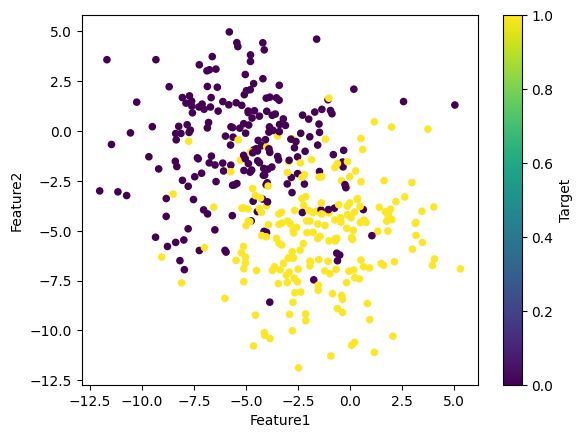

In [128]:
from sklearn.datasets import make_blobs

data = make_blobs(n_samples=400, n_features=2,centers=2,center_box=(-10.0,10.0),cluster_std=2.7,random_state=33)

x= pd.DataFrame(data[0],columns=['Feature1','Feature2'])
y= pd.DataFrame(data[1],columns=['Target'])

df=pd.concat([x,y],ignore_index=True,axis=1)
df.columns=['Feature1','Feature2','Target']

df.plot.scatter(x='Feature1',y='Feature2',c='Target',colormap='viridis')


In [129]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=42)
y_train.value_counts(),y_test.value_counts()

(Target
 0         140
 1         140
 dtype: int64,
 Target
 0         60
 1         60
 dtype: int64)

In [130]:
model = LogisticRegression(random_state=42,max_iter=3000,penalty=None,solver='saga')
model.fit(x_train,y_train['Target'])
model.intercept_,model.coef_

(array([-0.58451586]), array([[ 0.39010881, -0.60871815]]))

In [131]:
theta0 = model.intercept_[0]
theta1 = model.coef_[0][0]
theta2 = model.coef_[0][1]

m = -(theta1/theta2)
c= -(theta0/theta2)

## as we know that the values are ranging in b/w -10 to 10

x1 = np.arange(-10,10,0.2)
x2 = m*x1 +c
print(f'slope is :{m} \nintercept is : {c}')

slope is :0.6408693539744998 
intercept is : -0.9602405506558578


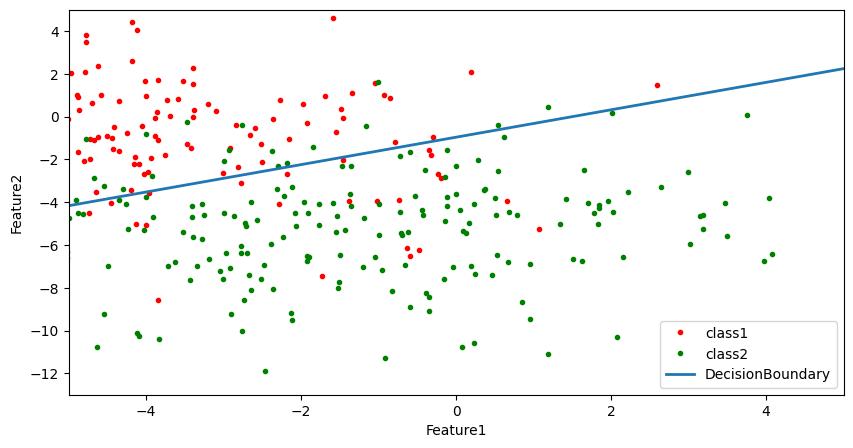

In [132]:
plt.figure(figsize=(10,5))
##plotting the target 0
plt.plot(df['Feature1'][df['Target']==0],df['Feature2'][df['Target']==0],'r.')
## plotting the target 1
plt.plot(df['Feature1'][df['Target']==1],df['Feature2'][df['Target']==1],'g.')
## plotting the decision boundary where we got values of x1,x2 above
plt.plot(x1,x2,linewidth=2)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(['class1','class2','DecisionBoundary'])
## setting the axis for better visualization
plt.axis([-5,5,-13,5])
plt.show()

In [133]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred,average=None))
print(recall_score(y_test,y_pred,average=None))

[[60  0]
 [ 0 60]]
[1. 1.]
[1. 1.]


### Reguarization with logistic regression

slope is :0.6412130401510145 
intercept is : -0.9587806970945031


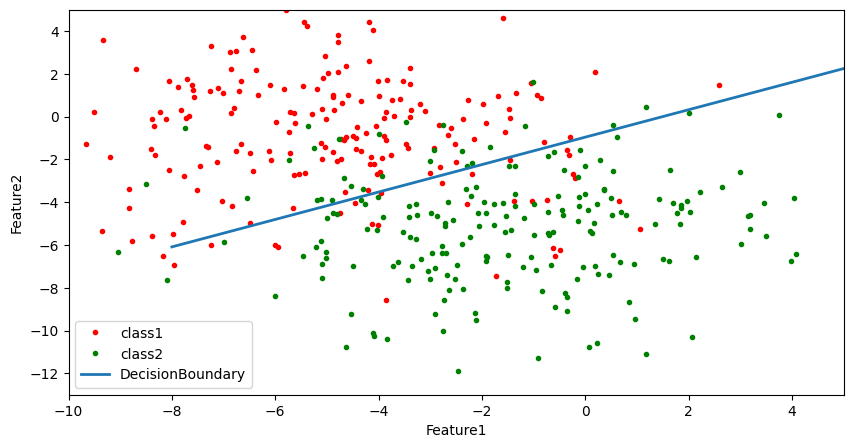

In [134]:
model = LogisticRegression(random_state=42,max_iter=3000,penalty='l2',solver='saga',C=3)
model.fit(x_train,y_train['Target'])
model.intercept_,model.coef_


theta0 = model.intercept_[0]
theta1 = model.coef_[0][0]
theta2 = model.coef_[0][1]

m = -(theta1/theta2)
c= -(theta0/theta2)

## as we know that the values are ranging in b/w -10 to 10

x1 = np.arange(-8,8,0.2)
x2 = m*x1 +c
print(f'slope is :{m} \nintercept is : {c}')


plt.figure(figsize=(10,5))
##plotting the target 0
plt.plot(df['Feature1'][df['Target']==0],df['Feature2'][df['Target']==0],'r.')
## plotting the target 1
plt.plot(df['Feature1'][df['Target']==1],df['Feature2'][df['Target']==1],'g.')
## plotting the decision boundary where we got values of x1,x2 above
plt.plot(x1,x2,linewidth=2)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(['class1','class2','DecisionBoundary'])
## setting the axis for better visualization
plt.axis([-10,5,-13,5])
plt.show()



#### By tuning the value of alpha i.e, paramter C we can see that the decisioon boundary moving based on the value given.

## Evaluation metrics for classification
---------------------------------------------------------------------
Jaccard Index:
Jaccard similarity coefficient

For a binary classification problem, the Jaccard Index is calculated as the intersection of the predicted positive instances and the actual positive instances divided by the union of the predicted positive instances and the actual positive instances. It is formally defined as:

Jaccard Index=∣ytrue∩ypred∣∣ytrue∪ypred∣Jaccard Index=∣ytrue​∪ypred​∣∣ytrue​∩ypred​∣​

Where:

    ytrue: ytrue​ represents the set of actual positive instances (ground truth).
    ypred : ypred​ represents the set of predicted positive instances.
    ∣⋅∣∣⋅∣ denotes the cardinality (number of elements) of a set.

The Jaccard Index ranges from 0 to 1, where:

    A Jaccard Index of 0 indicates no overlap between the predicted and actual positive instances, implying no similarity.
    A Jaccard Index of 1 indicates perfect overlap between the predicted and actual positive instances, implying perfect similarity

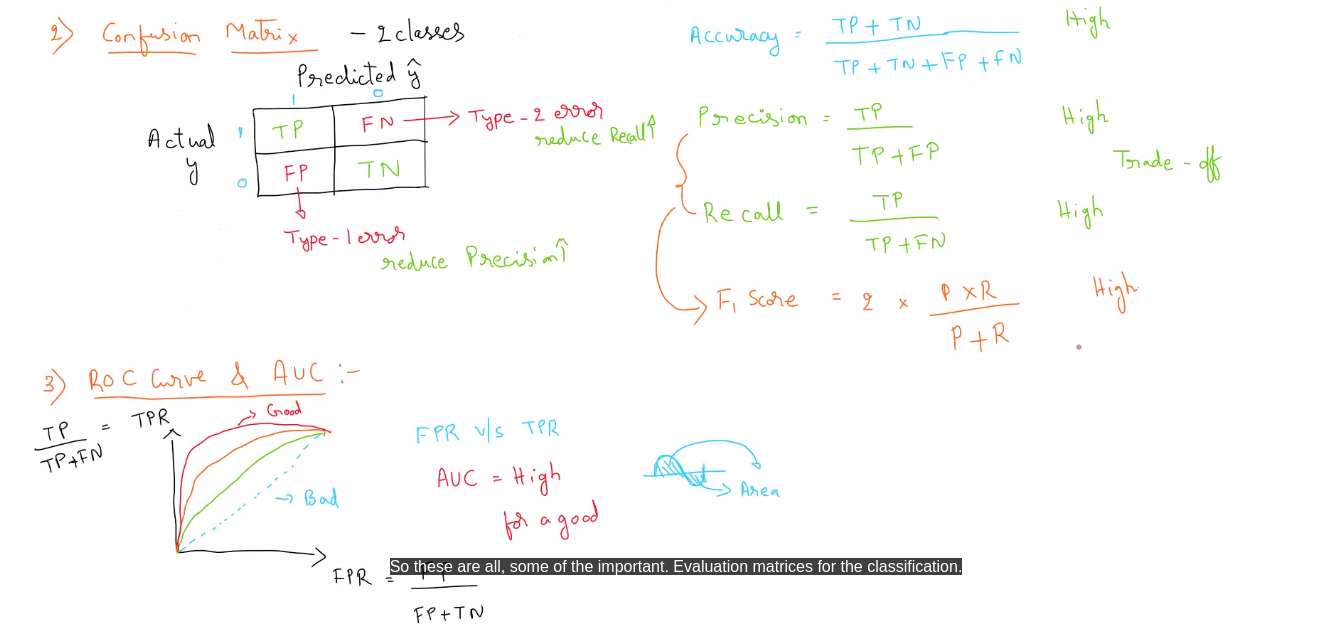

Evaluate the performance of Logistic Regression

In [135]:
y_pred = model.predict(x_test)


In [136]:
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred,average=None))
print(recall_score(y_test,y_pred,average=None))

[[51  9]
 [10 50]]
[0.83606557 0.84745763]
[0.85       0.83333333]


In [139]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve


print(f'Accuracy :{accuracy_score(y_test,y_pred)}')

Accuracy :0.8416666666666667


In [140]:
print(f'Roc :{roc_curve(y_test,y_pred)}')

Roc :(array([0.  , 0.15, 1.  ]), array([0.        , 0.83333333, 1.        ]), array([2, 1, 0]))


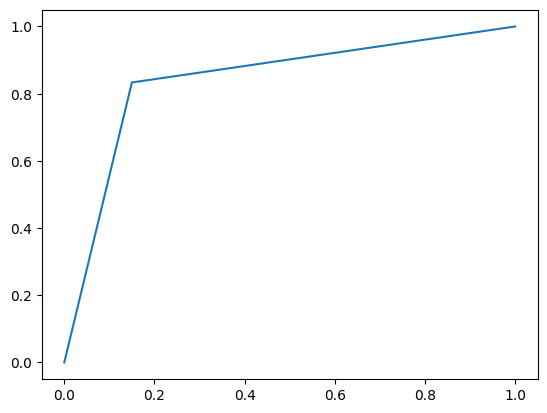

In [141]:
fpr,tpr,th = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.show()

In [142]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.8416666666666667